In [1]:
%matplotlib inline 
import gzip
import numpy as np
import pickle
import matplotlib.pyplot as plt
from aenum import MultiValueEnum
from eolearn.core import LinearWorkflow
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as patches

In [86]:


# band = gzip.GzipFile('datasets/2021-01/ГПН-2013-1/mask/CLP.npy.gz', "r", True)
# bbox = gzip.GzipFile('datasets/2021-01/ГПН-2013-1/bbox.pkl.gz', "r")
# meta_info = gzip.GzipFile('datasets/2021-01/ГПН-2013-1/meta_info.pkl.gz', "r")
# timestamp= gzip.GzipFile('datasets/2021-01/ГПН-2013-1/timestamp.pkl.gz', "r")
# pickle.load(bbox)

In [11]:
## На основе визуалиции составлена цветовая карта разлива нефтепродуктов
class ColorPICK(MultiValueEnum):

    NO_DATA = 'No Data', 0, '#ffffff'
    OIL = 'Oil', 1, '#4b4644'  
    OIL2 = 'Oil2', 2, '#2f2d2c'   
    OIL3 = 'Oil3', 3, '#635a55'
    
    @property
    def id(self):
        return self.values[1]

    @property
    def color(self):
        return self.values[2]

pol = [(15, 0), (14, 3), (13, 5), (8, 5), (9, 9), (13, 12), (18, 14), (20, 12), (22, 9), (19, 6), (21, 0)]
def get_bounds_from_ids(ids):
    bounds = []
    for i in range(len(ids)):
        if i < len(ids) - 1:
            if i == 0:
                diff = (ids[i + 1] - ids[i]) / 2
                bounds.append(ids[i] - diff)
            diff = (ids[i + 1] - ids[i]) / 2
            bounds.append(ids[i] + diff)
        else:
            diff = (ids[i] - ids[i - 1]) / 2
            bounds.append(ids[i] + diff)
    return bounds


color_bounds = get_bounds_from_ids([x.id for x in ColorPICK])
color_cmap = ListedColormap(colors=[x.color for x in ColorPICK], name="picked_cmap")
color_norm = BoundaryNorm(color_bounds, color_cmap.N)

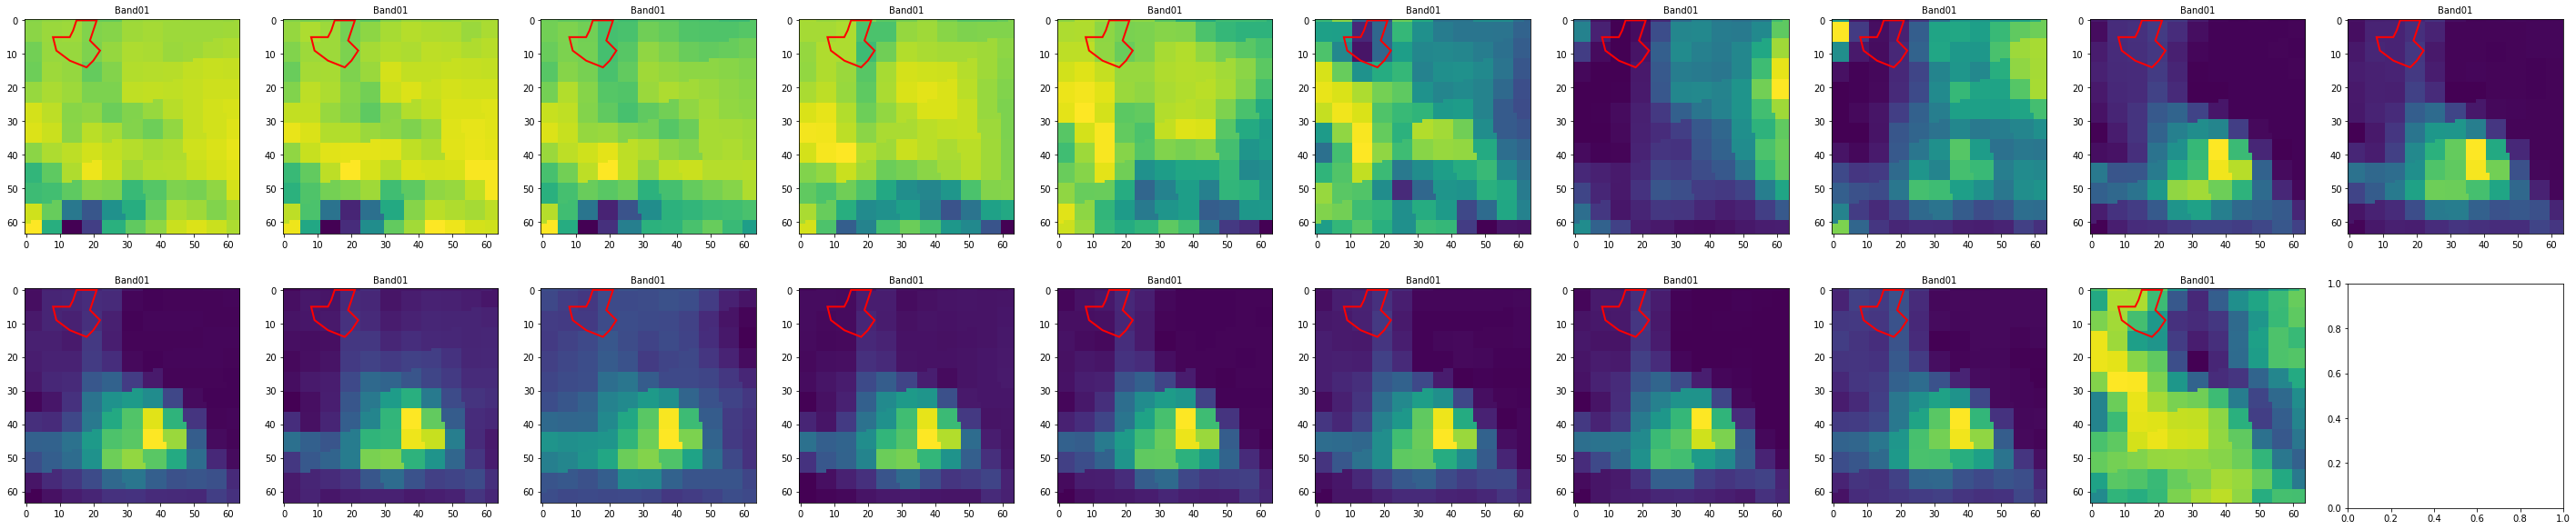

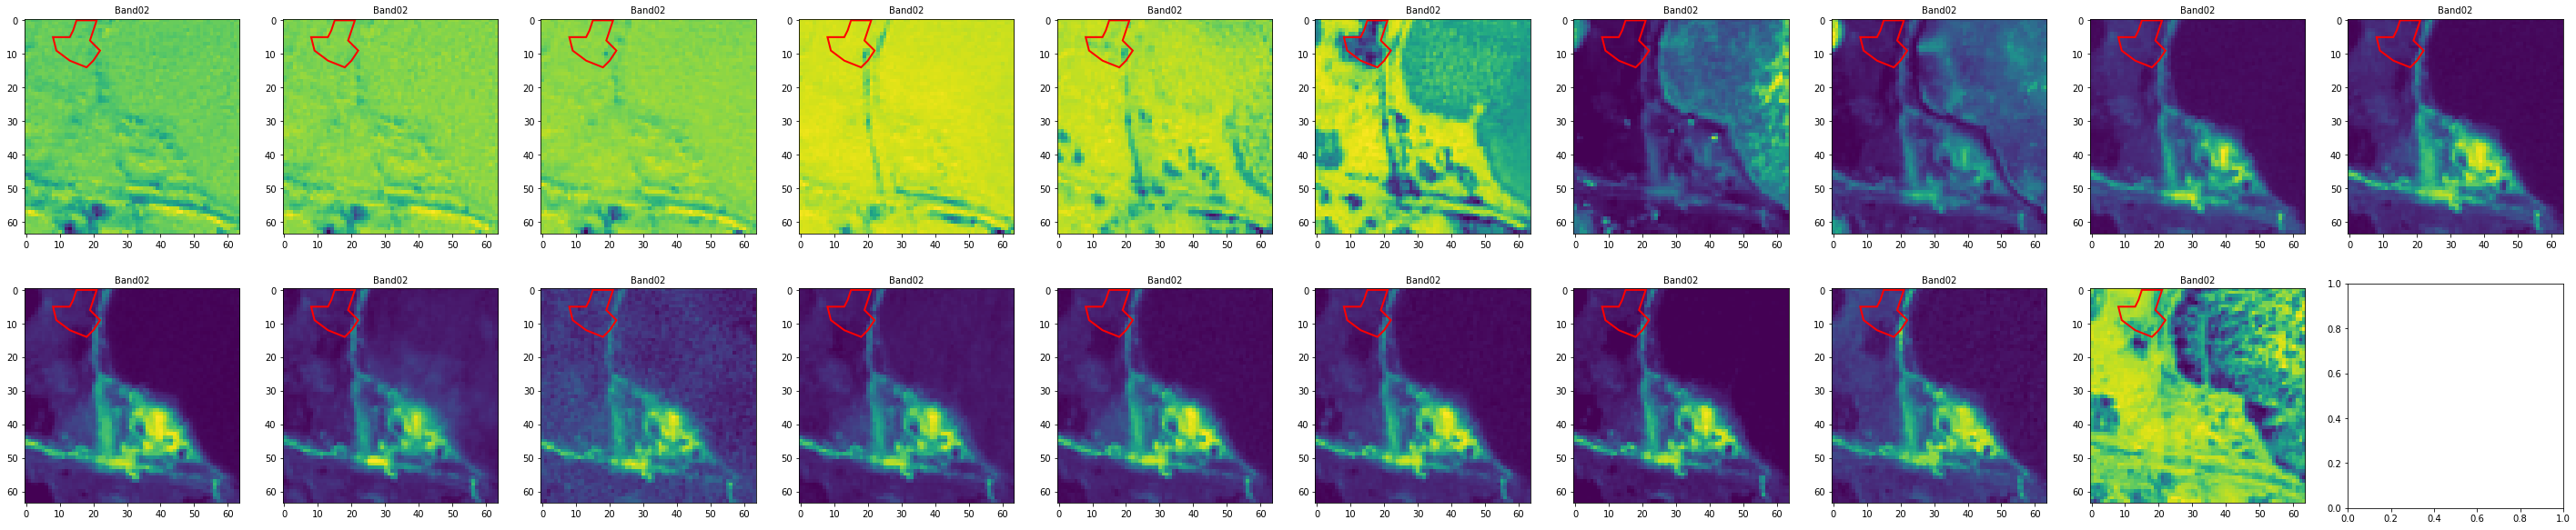

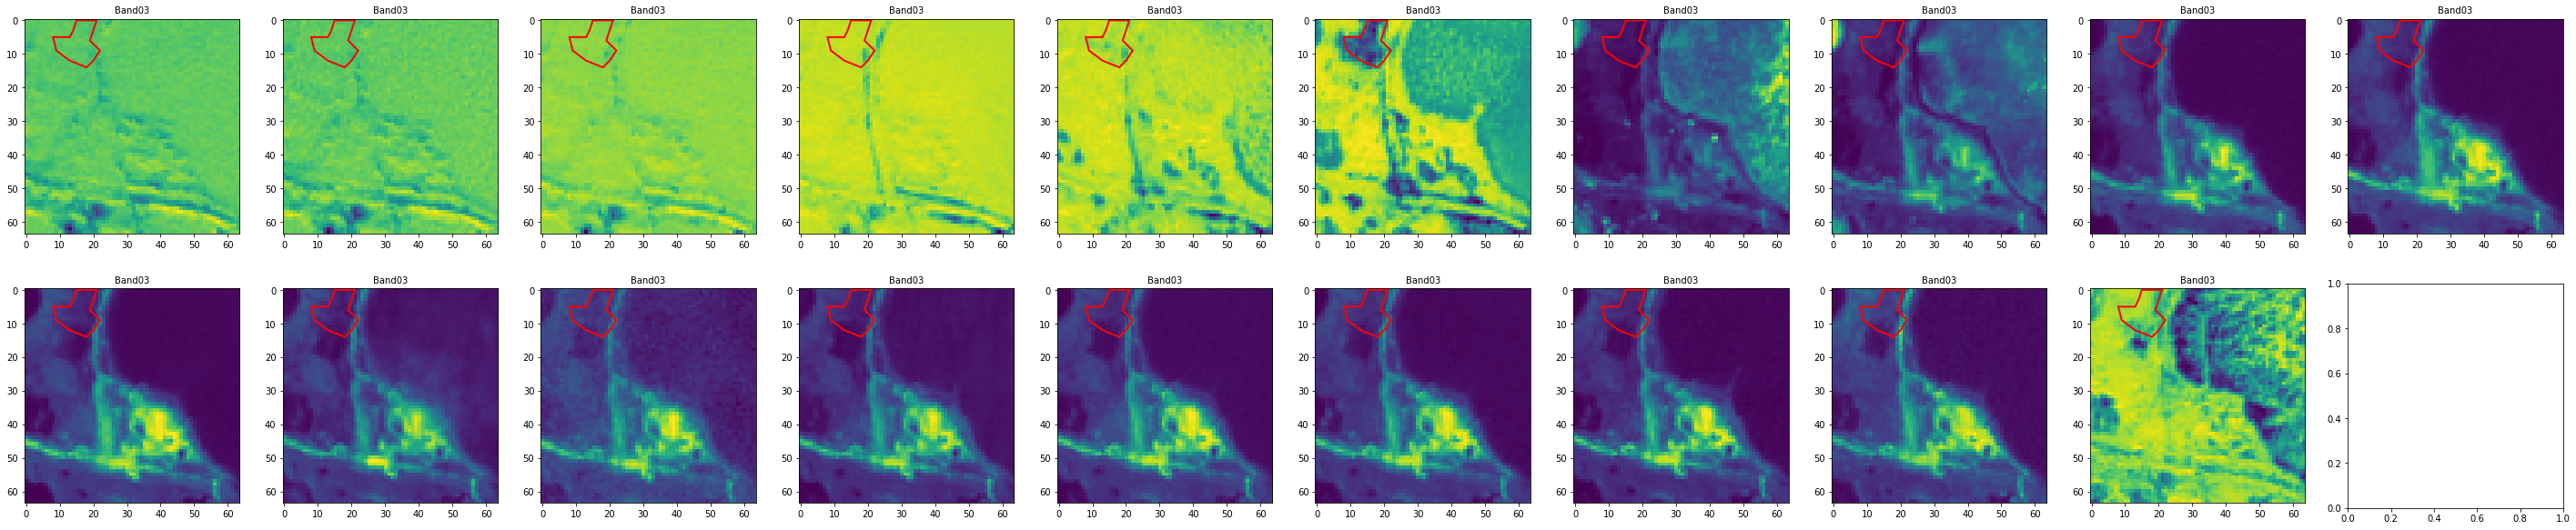

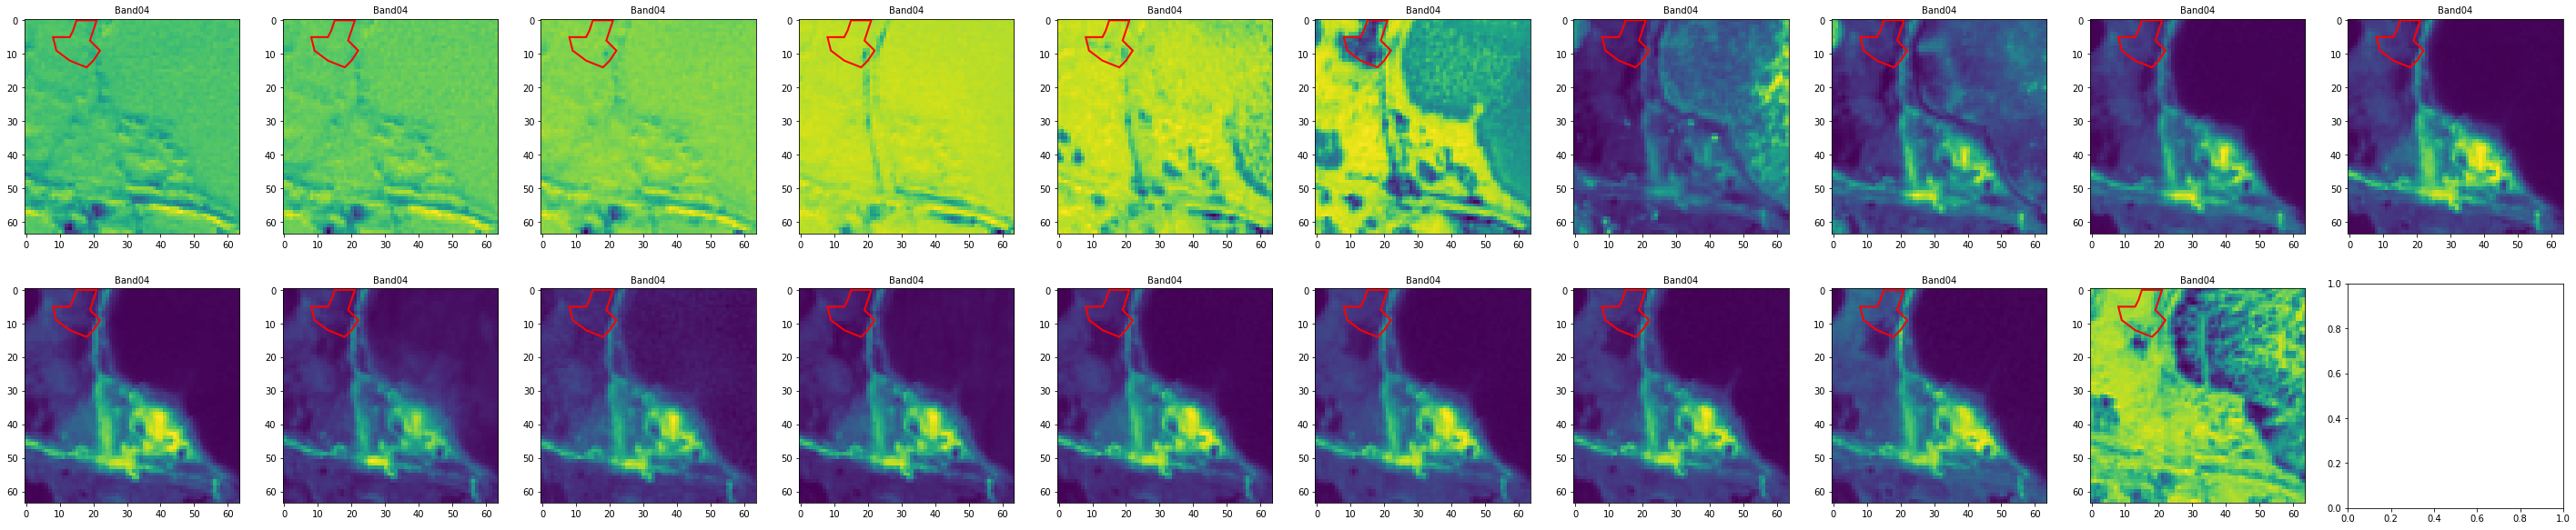

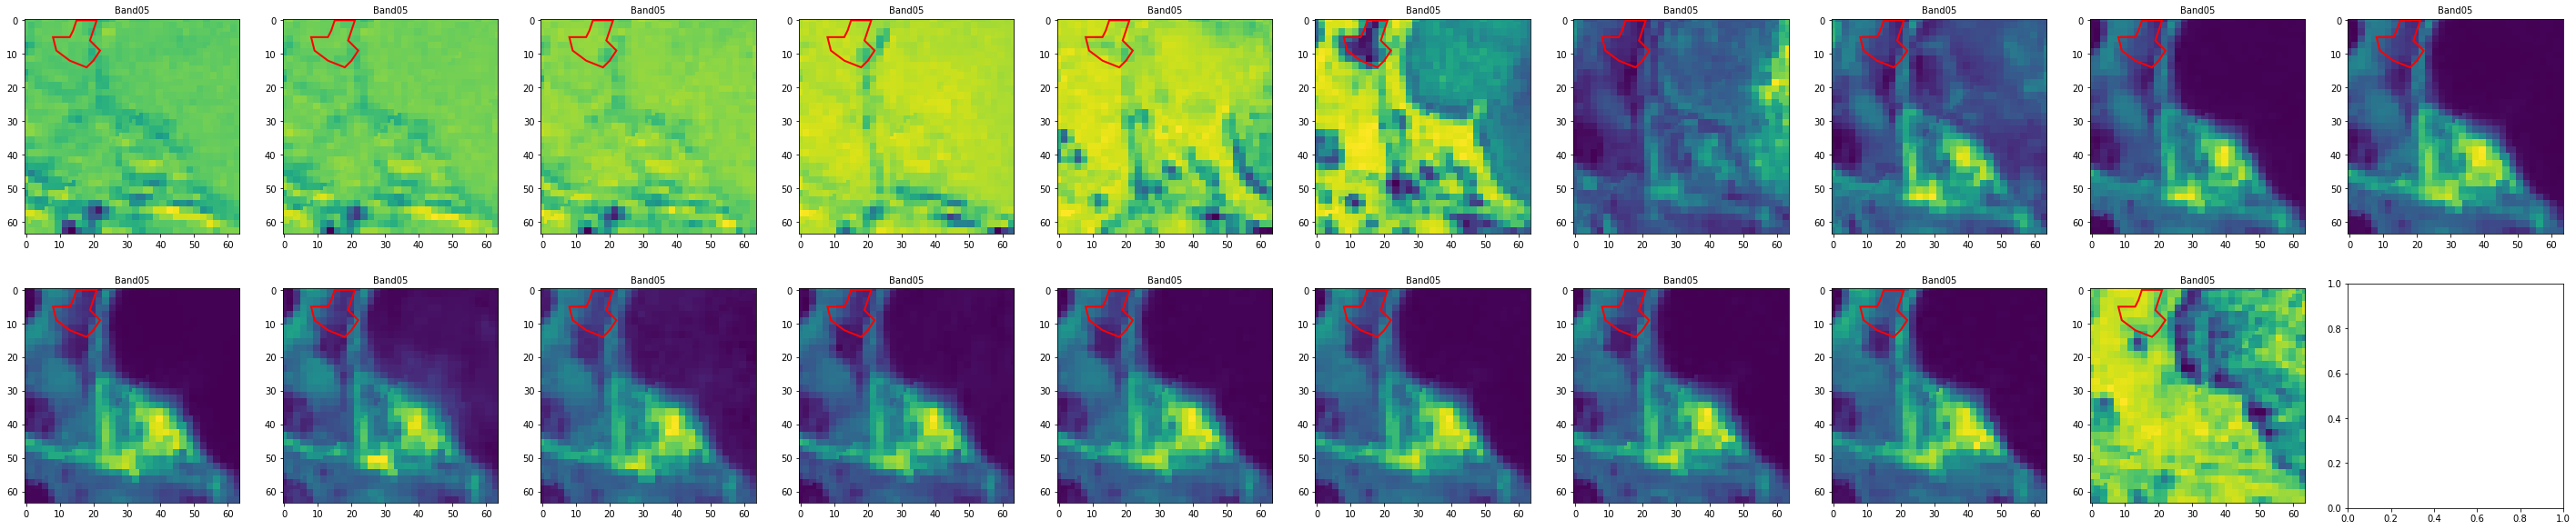

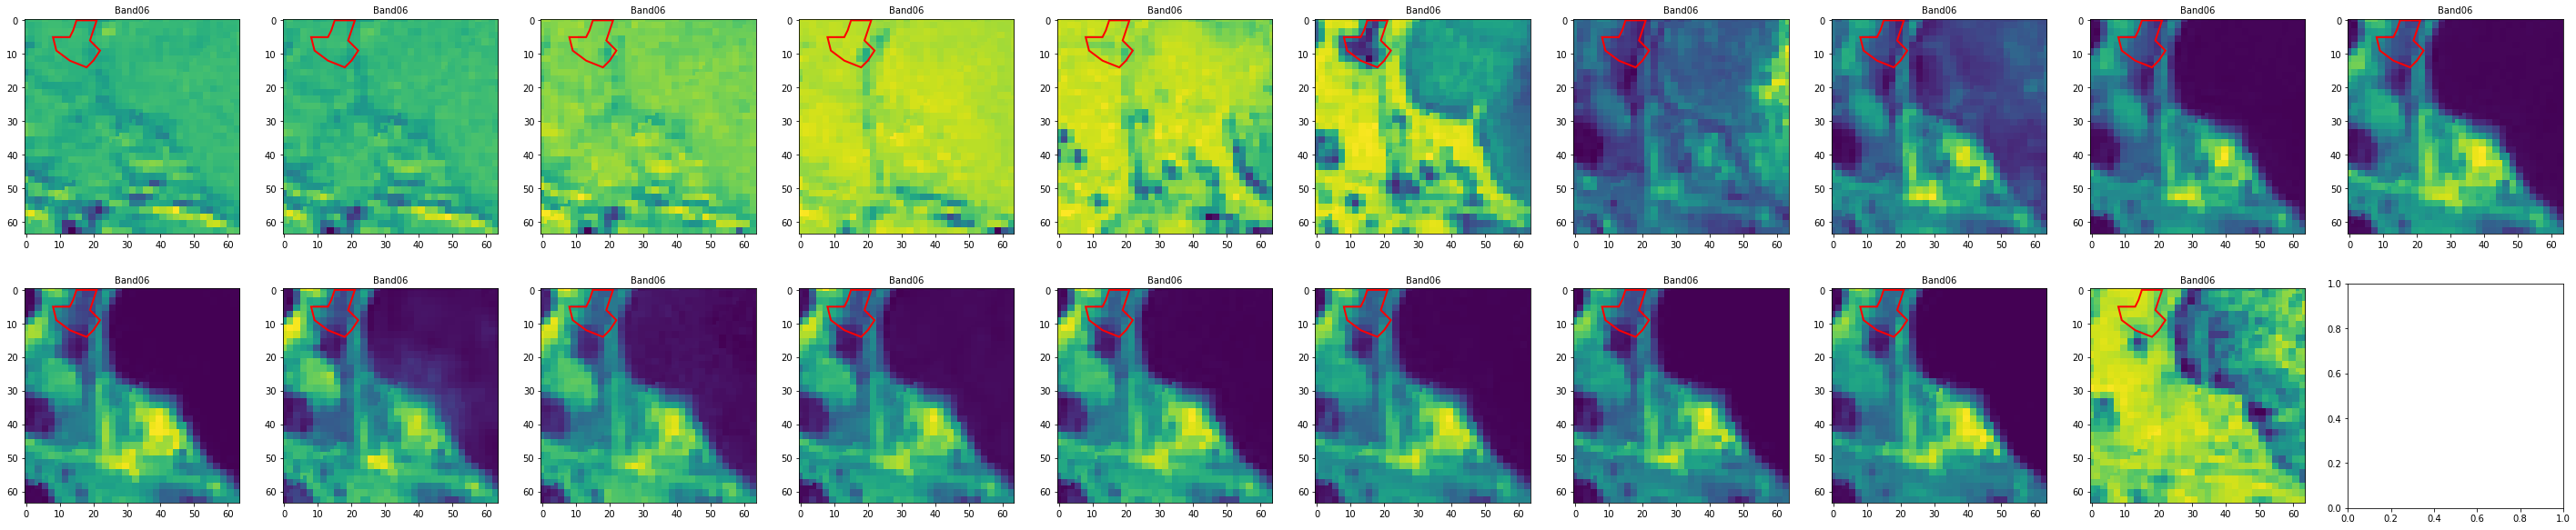

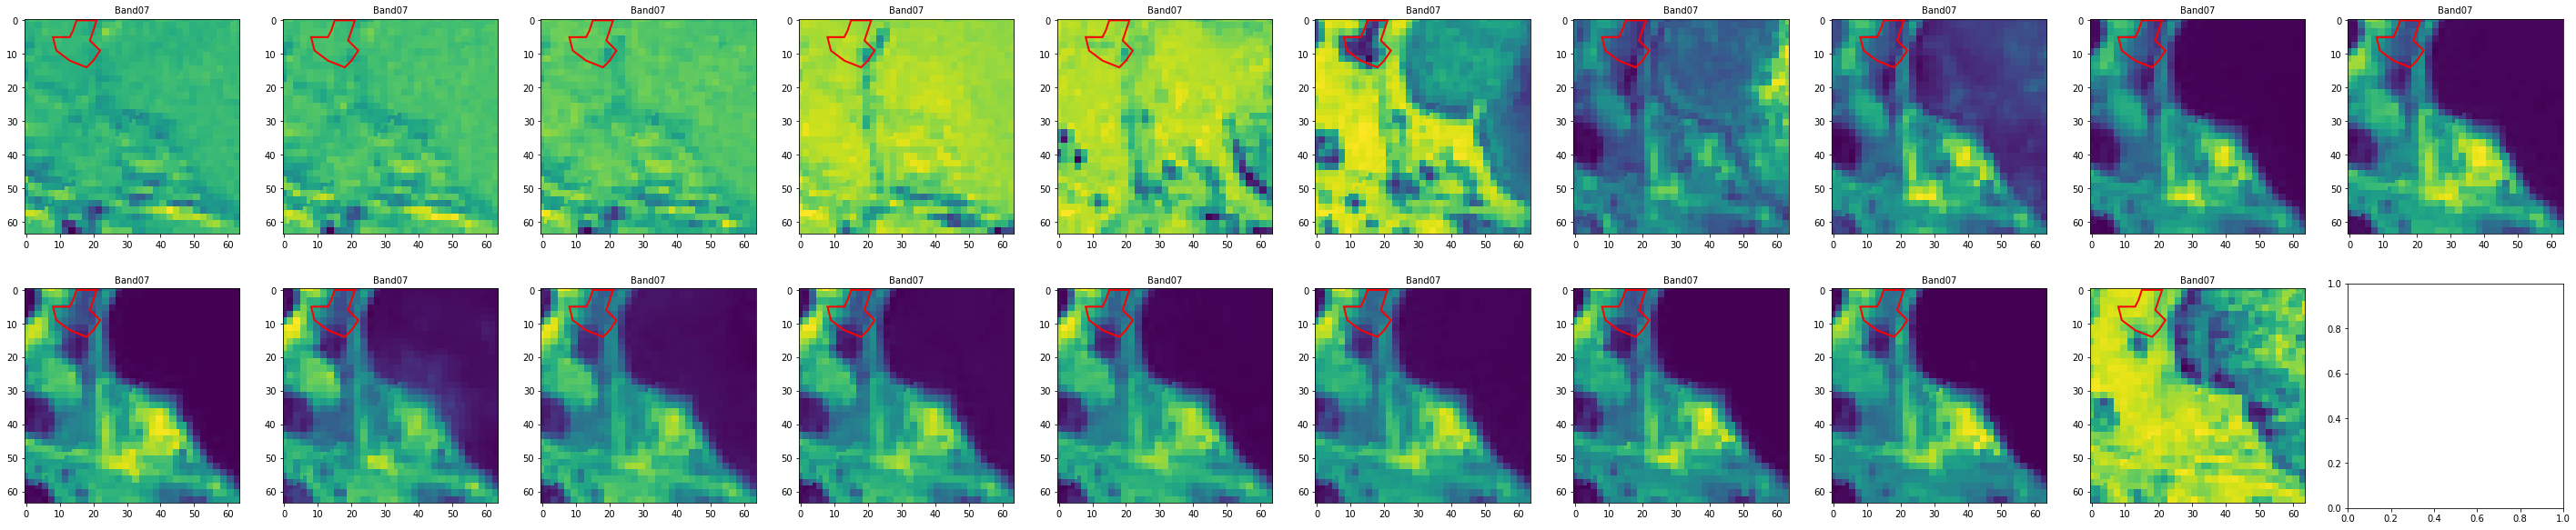

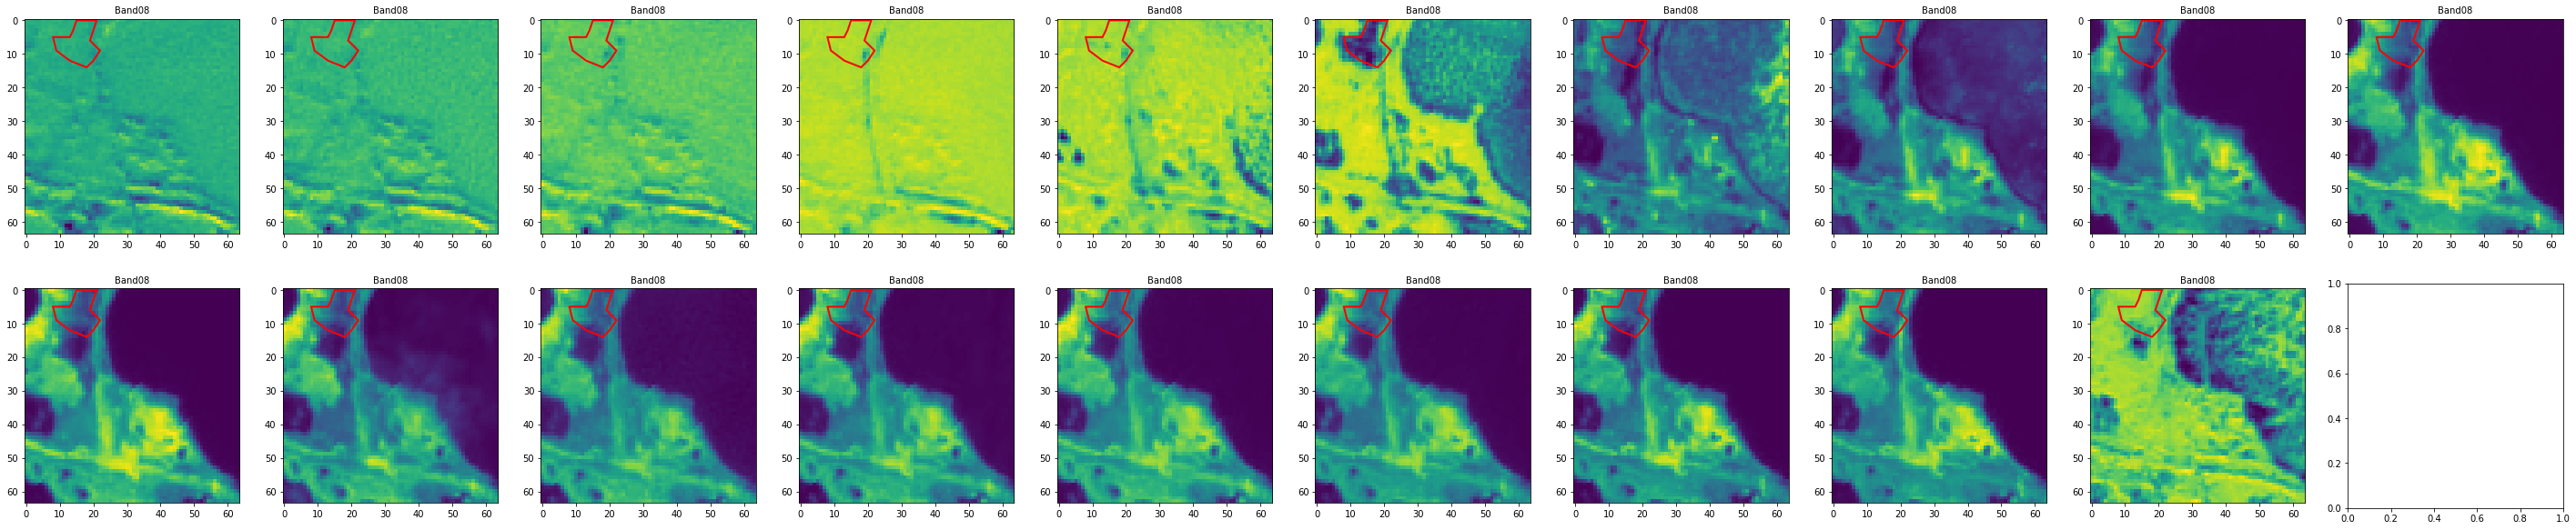

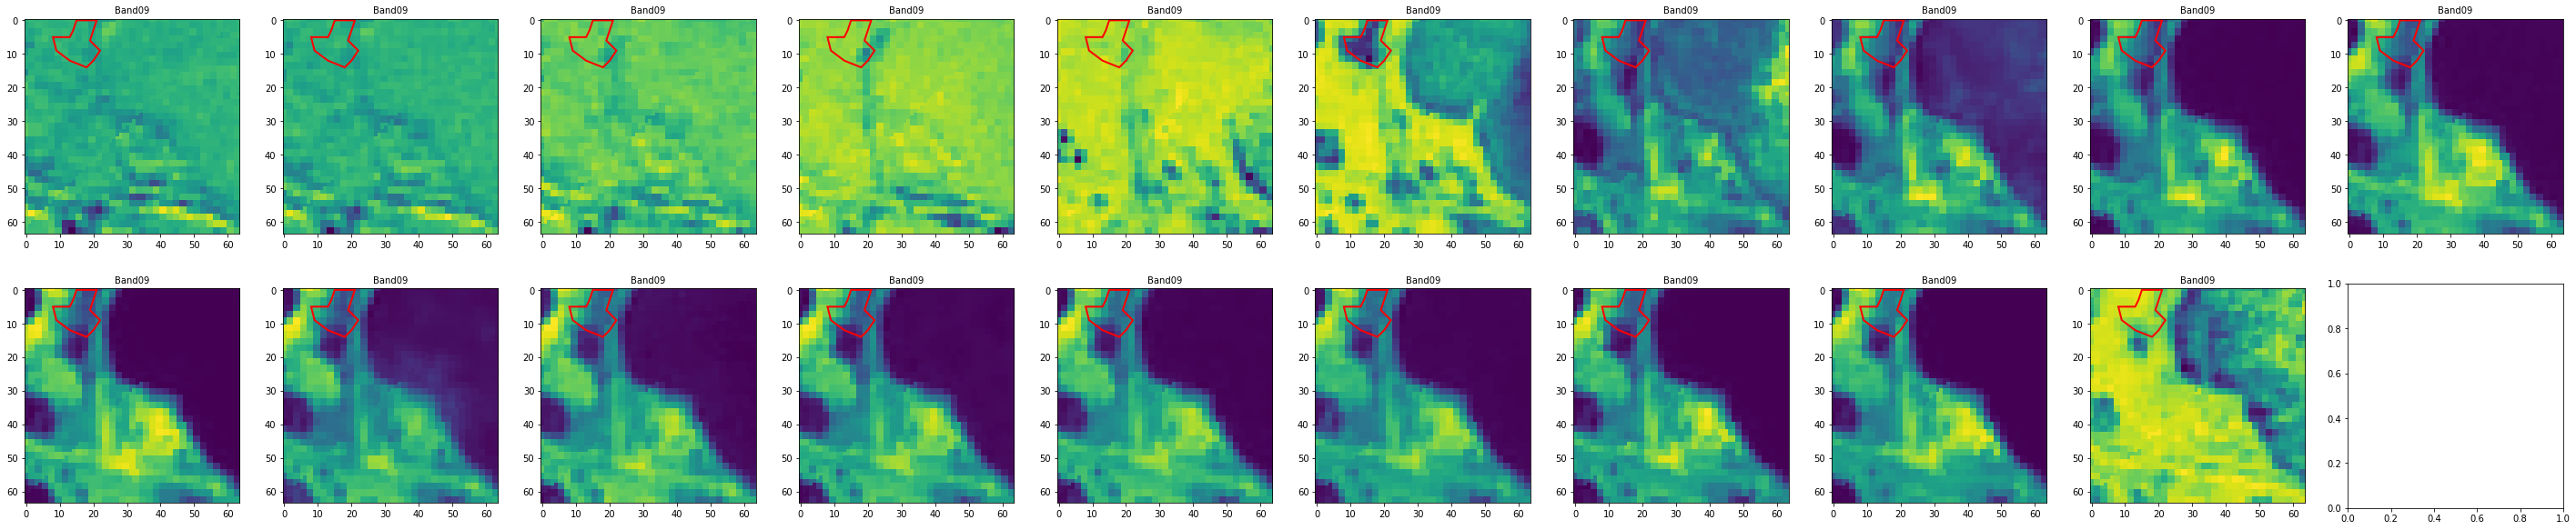

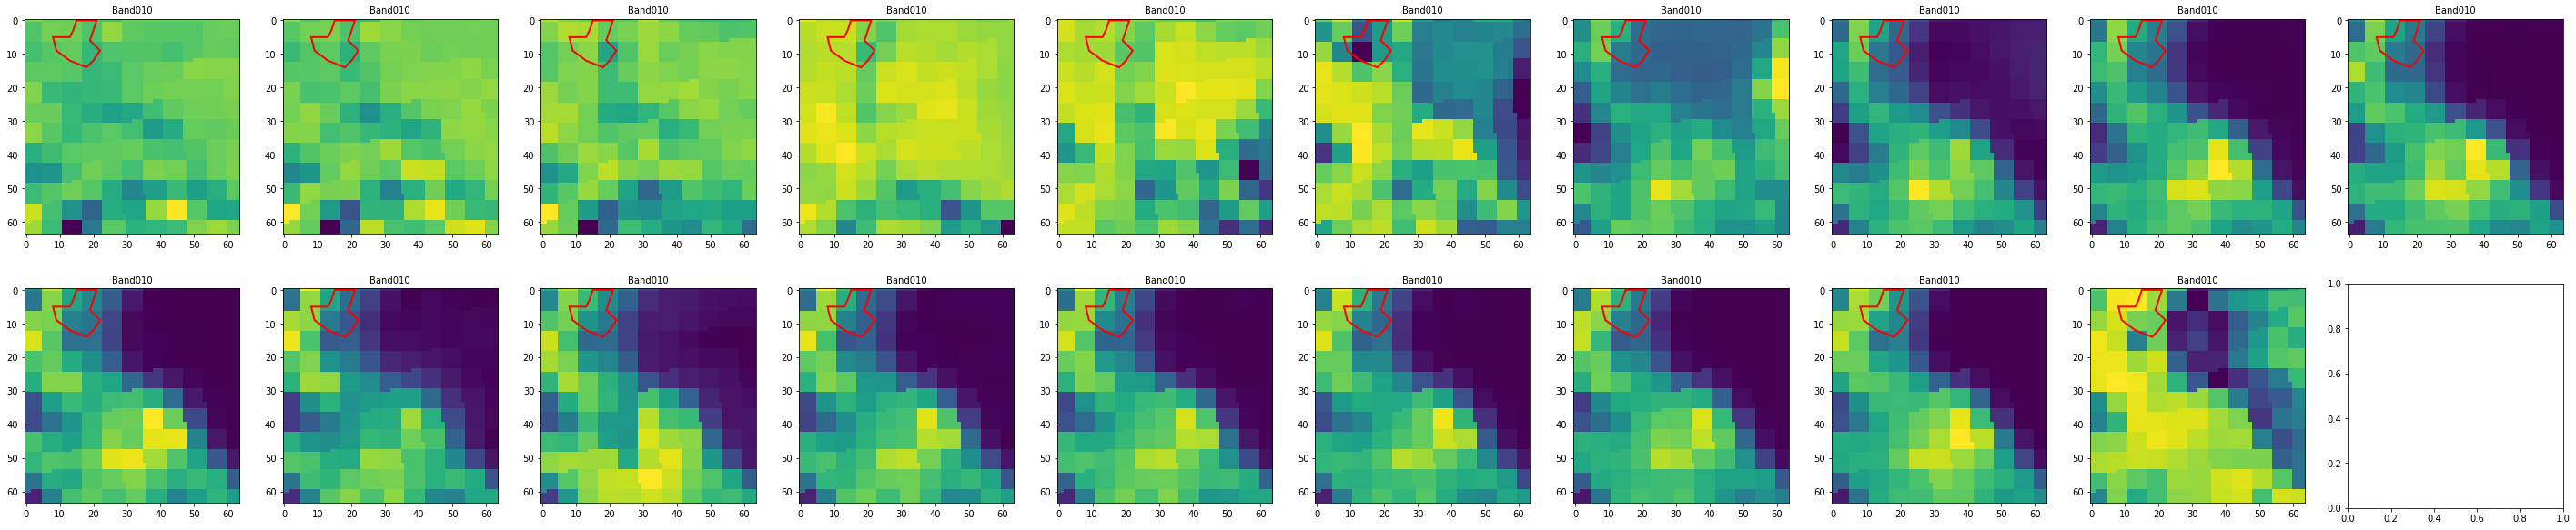

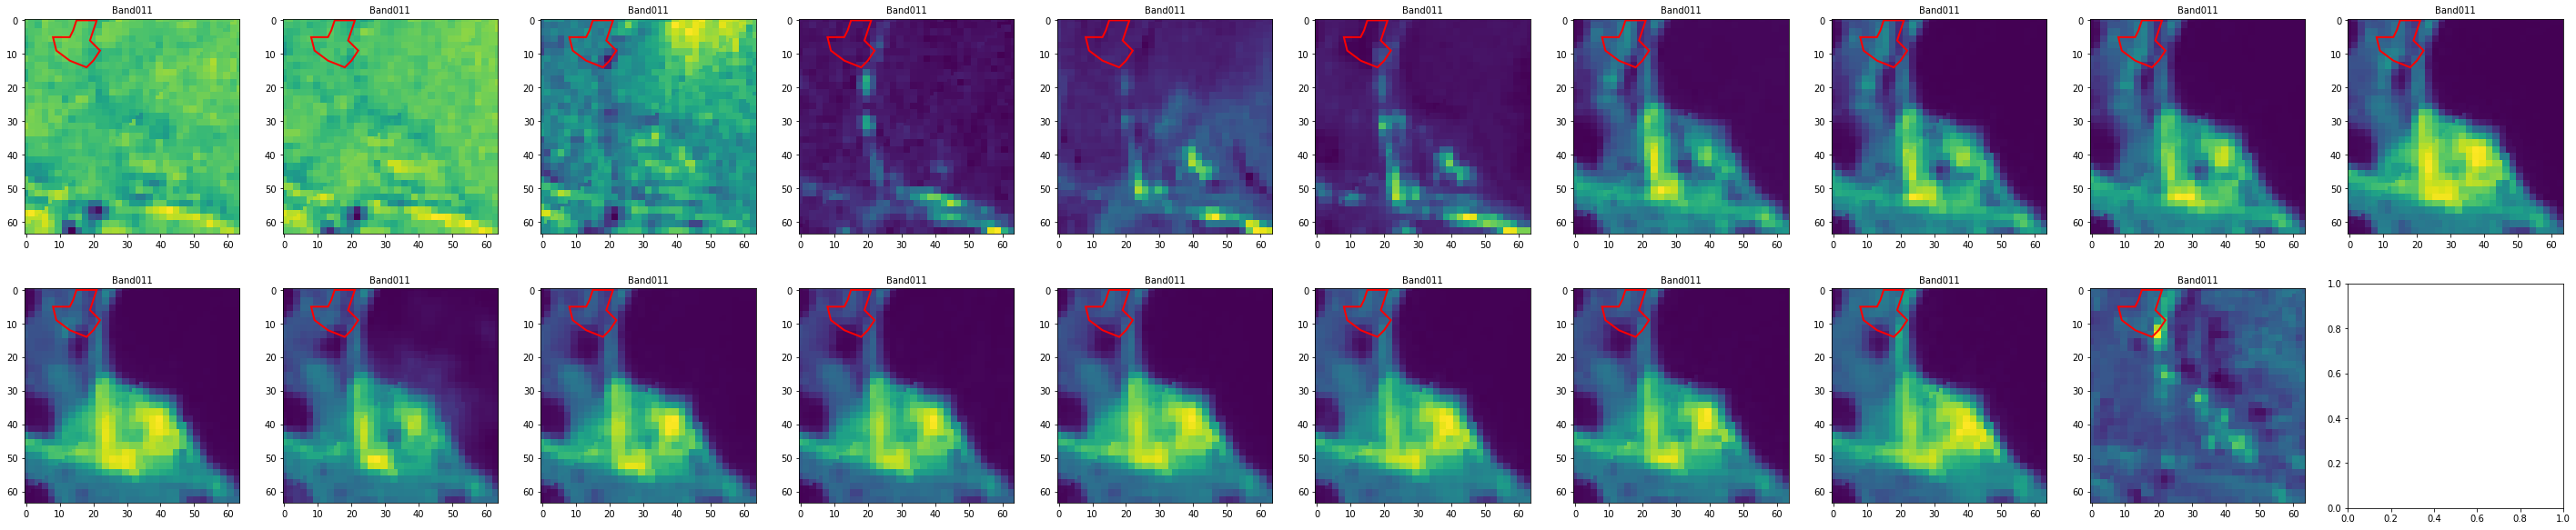

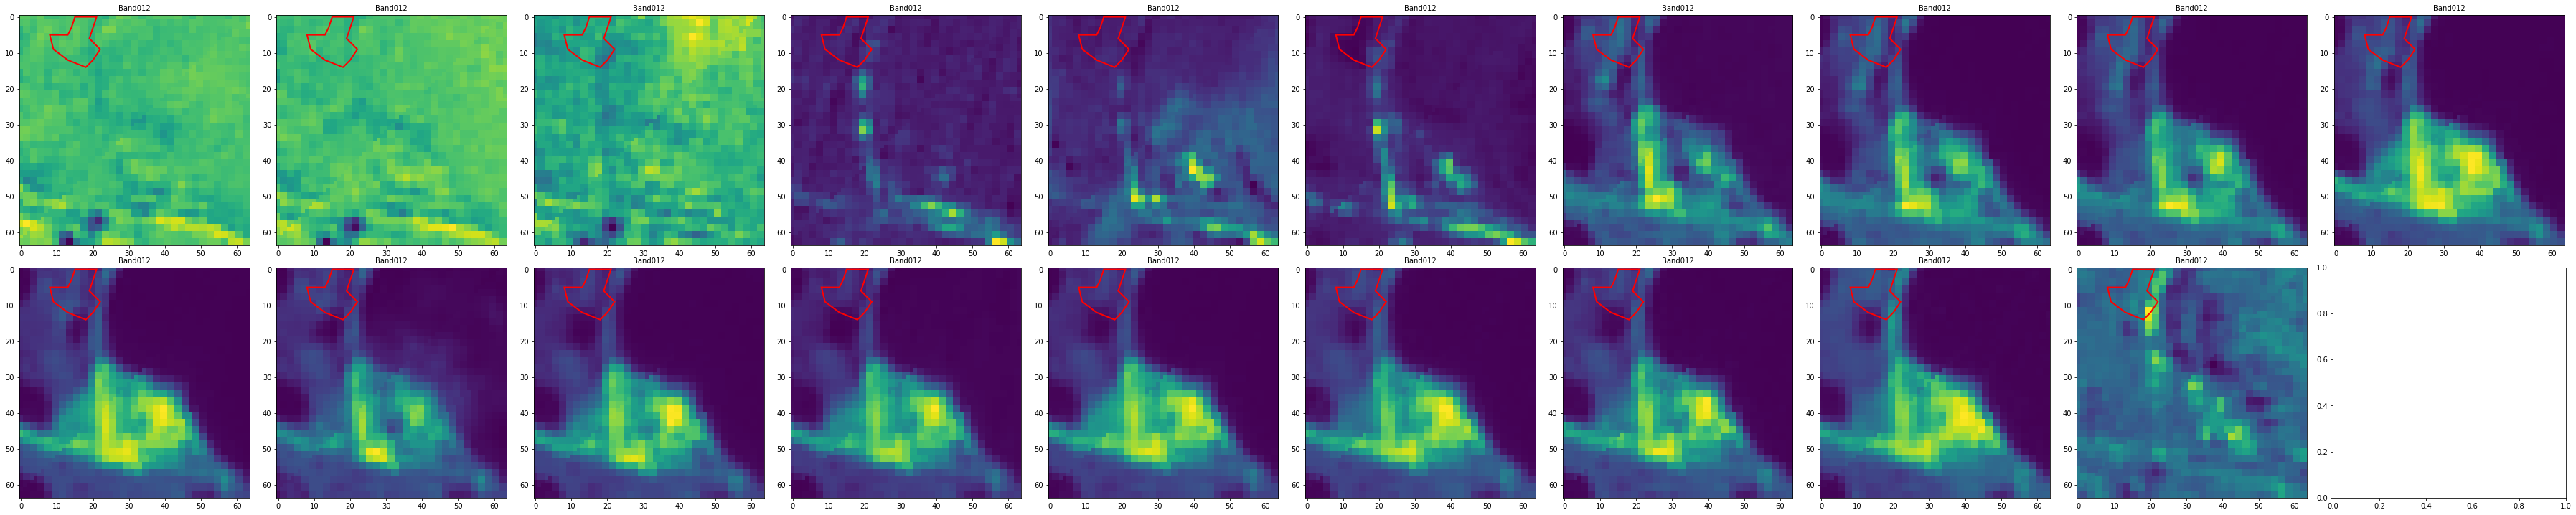

In [13]:
## Анализ входных данных
dataset = gzip.GzipFile('datasets/dirty/2021-01/ГПН-2013-1/data/L2A.npy.gz', "r", True)
dataset_np = np.load(dataset, allow_pickle=True)
dataset_shape = dataset_np.shape

## Эксперты посоветовали не объединять bbox в единый AOI
ncols = 10
nrows = 2
    
for band in range(0, 12):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5 * ncols, 5 * nrows))
    for index, image in enumerate(dataset_np):
        ax = axs[index // ncols][index % ncols]
        ax.imshow(dataset_np[index,:,:,band])
        ax.set_title(f'Band0{band+1}', fontsize=10)
        
        rect = patches.Polygon(pol,
                 linewidth=2,
                 edgecolor='red',
                 fill = False)
        ax.add_patch(rect)
plt.tight_layout()